In [18]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [19]:
# Fourier transform
img = cv2.imread('Edge2.jpeg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spec = 20*np.log(np.abs(fshift))

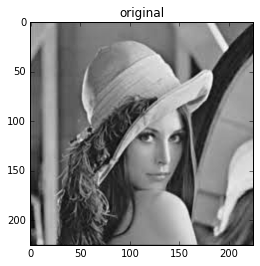

In [20]:
plt.imshow(img,"gray"),plt.title("original")
plt.show()

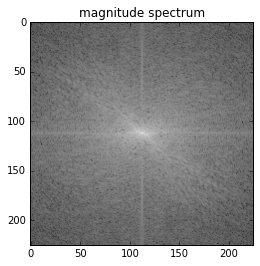

In [7]:
plt.imshow(magnitude_spec,"gray"),plt.title("magnitude spectrum")
plt.show()

In [21]:
#High pass filtering
#Apply a rectangular mask of (30,30)
rows,cols = img.shape
#center pixel position
crows,ccols = rows/2,cols/2
#Applying mask 
fshift[crows-15:crows+15,ccols-15:ccols+15]=0

#Inverse fourier transform
f = np.fft.ifftshift(fshift)
filtered_img = np.fft.ifft2(f)

#Converting to real image
abs_img = np.abs(filtered_img)

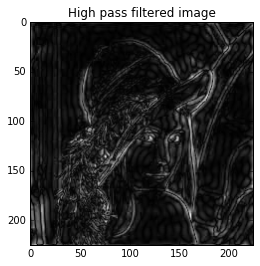

In [22]:
plt.imshow(abs_img,"gray"),plt.title("High pass filtered image")
plt.show()

In [24]:
#Fourier transform
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

#Low pass filtering
rows,cols = img.shape
crows,ccols = rows/2,cols/2
mask = np.zeros((rows,cols))
mask[crows-30:crows+30,ccols-30:ccols+30]=1
f_shift = fshift*mask

inv_f = np.fft.ifftshift(f_shift)
low_pass_img = np.fft.ifft2(inv_f)
final_img = np.abs(low_pass_img)

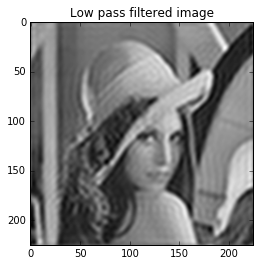

In [25]:
plt.imshow(final_img,"gray"),plt.title("Low pass filtered image")
plt.show()

In [27]:
laplacian_kernel = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

In [28]:
f = np.fft.fft2(laplacian_kernel)
fshift = np.fft.fftshift(f)
mag = 20*np.log(np.abs(fshift)+1)

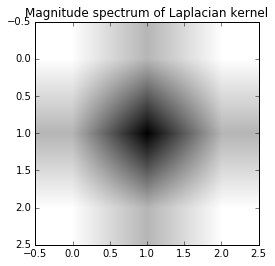

In [29]:
plt.imshow(mag,"gray"),plt.title("Magnitude spectrum of Laplacian kernel")
plt.show()

In [32]:
x = cv2.getGaussianKernel(5,10)
gaussian_kernel = x*x.T
f = np.fft.fft2(gaussian_kernel)
fshift = np.fft.fftshift(f)
mag = 20*np.log(np.abs(fshift)+1)

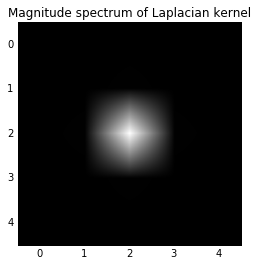

In [33]:
plt.imshow(mag,"gray"),plt.title("Magnitude spectrum of Laplacian kernel")
plt.show()